## US Police Violence & Fatal Shootings - Black Lives Matter!

### Introduction

In this notebook, I have done exploratory data analysis on the US police violence & fatal shootings against citizen between 2015 and till date 2020 using the dataset provided on <a href = 'https://www.kaggle.com/jpmiller/police-violence-in-the-us'>kaggle</a> and the data dictionary is also available <a href = 'https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/'>here</a>. This analysis will not only discuss about black race people but in fact all races living in the United State. 

This analysis is based on a Data Science Methodology called Cross Industry Process for Data Minning, CRISP-DM, which comprises of six steps. They are;

<ul>
    <li> Business understanding </li>
    <li> Data understanding </li>
    <li> Data preparation </li>
    <li> Data modelling - (Exploratory Data Analysis and Visualization) </li>
    <li> Evaluation - (Conclusion) </li>
    <li> Deployment - Storytelling (Medium)</li>
</ul>

Note that, Data modelling, Evaluation and Deployment are used based on this type of analysis which are not the exact usage according the methodology applied.

### Business Understanding

The intention of this analysis is to answer the outlined questions using the given dataset. The goal is to/show;
<ul>
    <li><a href = '#Question1'>generate full death report yearly, monthly (that is, in each year) and dayly to identify which day, month and year   death is highly recorded. </a></li>
    <li><a href = '#Question2'>percentage of age bucket(group) and gender affected</a></li>
    <li><a href = '#Question3'>most affected race, state, city and demography </a></li>
    <li><a href = '#Question4'>proportion of flee or not flee and threat to the police or not </a></li>
    <li><a href = '#Question5'>most used arms </a></li>
    <li><a href = '#Question6'>Black lives Matter, further insight on black race </a></li>
</ul>


### Data Understanding and Data Preparation

Data understanding is typically checking if the data we have is representative of the problem to be solved. The answer is **Yes**. On the other hand, data preparation is stage at which the data must be checked for missing values, duplicates, data types and summary statistics etc and make it ready for modelling (in this case, modelling is exploratory data analysis and visualization).

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')
import seaborn as sb
import datetime as dt
from scipy import stats

In [2]:
#Load dataset
filename = 'https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv'
police_violence = pd.read_csv(filename)
police_violence.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing        False   -123.122    47.247                True  
1  Not fleeing        False   -122.892    45.487                True  
2  Not fleeing        False    -97.281    37.695                True  
3  Not fleeing        False   -122.422    37.763                True  
4  Not fleeing        False   -104.692    40.384                True

In [3]:
print(f'The number of samples in the dataset is {police_violence.shape[0]}')

The number of samples in the dataset is 5610


In [4]:
print(f'Data Shape is: {police_violence.shape}')

Data Shape is: (5610, 17)


In [5]:
# check for duplicate sample
police_violence.duplicated().any()

False

In [6]:
# check dataset information
police_violence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5610 non-null   int64  
 1   name                     5405 non-null   object 
 2   date                     5610 non-null   object 
 3   manner_of_death          5610 non-null   object 
 4   armed                    5398 non-null   object 
 5   age                      5360 non-null   float64
 6   gender                   5609 non-null   object 
 7   race                     4997 non-null   object 
 8   city                     5610 non-null   object 
 9   state                    5610 non-null   object 
 10  signs_of_mental_illness  5610 non-null   bool   
 11  threat_level             5610 non-null   object 
 12  flee                     5337 non-null   object 
 13  body_camera              5610 non-null   bool   
 14  longitude               

In [7]:
# check the percentage of missing values
missing_data = police_violence.isnull().mean() * 100
missing_data.sort_values(ascending = False)

race                       10.926916
flee                        4.866310
longitude                   4.795009
latitude                    4.795009
age                         4.456328
armed                       3.778966
name                        3.654189
gender                      0.017825
is_geocoding_exact          0.000000
date                        0.000000
manner_of_death             0.000000
city                        0.000000
state                       0.000000
signs_of_mental_illness     0.000000
threat_level                0.000000
body_camera                 0.000000
id                          0.000000
dtype: float64

Text(0.5, 1.0, 'Percentage of Missing Value in Features')

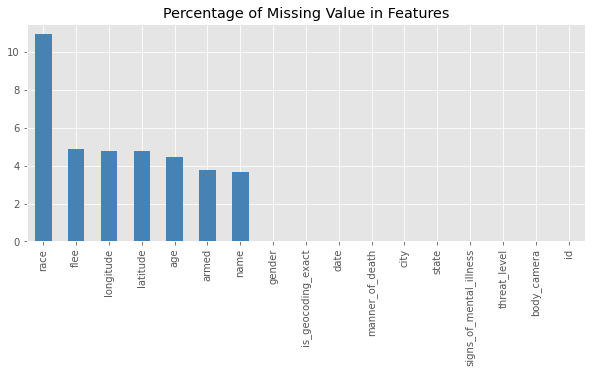

In [8]:
missing_data.sort_values(ascending = False).plot(kind = 'bar', figsize = (10,4), color = 'steelblue')
plt.title('Percentage of Missing Value in Features')

In [9]:
print('How many unique values are there in each column? ')
police_violence.apply(lambda x: len(x.unique()))

How many unique values are there in each column? 


id                         5610
name                       5390
date                       1919
manner_of_death               2
armed                        96
age                          78
gender                        3
race                          7
city                       2532
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          5
body_camera                   2
longitude                  4770
latitude                   4345
is_geocoding_exact            2
dtype: int64

In [10]:
# filling missing dataset
police_violence['age'].fillna(police_violence['age'].mean(), inplace = True)
police_violence['race'].fillna(str(police_violence['race'].mode().iloc[0]), inplace = True)
police_violence['flee'].fillna(str(police_violence['flee'].mode().iloc[0]), inplace = True)
police_violence['armed'].fillna(str(police_violence['armed'].mode().iloc[0]), inplace = True)
police_violence['gender'].fillna(str(police_violence['gender'].mode().iloc[0]), inplace = True)

In [11]:
# put the features in the right format
police_violence.age = police_violence.age.astype('int64')
police_violence.date = pd.to_datetime(police_violence.date)

In [12]:
police_violence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       5610 non-null   int64         
 1   name                     5405 non-null   object        
 2   date                     5610 non-null   datetime64[ns]
 3   manner_of_death          5610 non-null   object        
 4   armed                    5610 non-null   object        
 5   age                      5610 non-null   int64         
 6   gender                   5610 non-null   object        
 7   race                     5610 non-null   object        
 8   city                     5610 non-null   object        
 9   state                    5610 non-null   object        
 10  signs_of_mental_illness  5610 non-null   bool          
 11  threat_level             5610 non-null   object        
 12  flee                     5610 non-

In [13]:
# summary statistics of the dataset
police_violence.describe(include = 'all').T

count unique                  top  freq      first  \
id                       5610    NaN                  NaN   NaN        NaT   
name                     5405   5389      Michael Johnson     3        NaT   
date                     5610   1919  2018-04-01 00:00:00     9 2015-01-02   
manner_of_death          5610      2                 shot  5331        NaT   
armed                    5610     95                  gun  3395        NaT   
age                      5610    NaN                  NaN   NaN        NaT   
gender                   5610      2                    M  5363        NaT   
race                     5610      6                    W  3146        NaT   
city                     5610   2532          Los Angeles    86        NaT   
state                    5610     51                   CA   832        NaT   
signs_of_mental_illness  5610      2                False  4356        NaT   
threat_level             5610      3               attack  3632        NaT   
flee                     5610      4          Not fleeing  3788        NaT   
body_camera              5610      2                False  4951        NaT   
longitude                5341    NaN                  NaN   NaN        NaT   
latitude                 5341    NaN                  NaN   NaN        NaT   
is_geocoding_exact       5610      2                 True  5602        NaT   

                              last     mean      std      min      25%  \
id                             NaT  3116.12  1756.98        3  1596.25   
name                           NaT      NaN      NaN      NaN      NaN   
date                    2020-08-31      NaN      NaN      NaN      NaN   
manner_of_death                NaT      NaN      NaN      NaN      NaN   
armed                          NaT      NaN      NaN      NaN      NaN   
age                            NaT  37.1212  12.7925        6       27   
gender                         NaT      NaN      NaN      NaN      NaN   
race                           NaT      NaN      NaN      NaN      NaN   
city                           NaT      NaN      NaN      NaN      NaN   
state                          NaT      NaN      NaN      NaN      NaN   
signs_of_mental_illness        NaT      NaN      NaN      NaN      NaN   
threat_level                   NaT      NaN      NaN      NaN      NaN   
flee                           NaT      NaN      NaN      NaN      NaN   
body_camera                    NaT      NaN      NaN      NaN      NaN   
longitude                      NaT -97.2425  16.6342 -158.137 -112.117   
latitude                       NaT  36.6432  5.36726   19.498   33.474   
is_geocoding_exact             NaT      NaN      NaN      NaN      NaN   

                            50%      75%     max  
id                       3119.5  4647.75    6137  
name                        NaN      NaN     NaN  
date                        NaN      NaN     NaN  
manner_of_death             NaN      NaN     NaN  
armed                       NaN      NaN     NaN  
age                          36       45      91  
gender                      NaN      NaN     NaN  
race                        NaN      NaN     NaN  
city                        NaN      NaN     NaN  
state                       NaN      NaN     NaN  
signs_of_mental_illness     NaN      NaN     NaN  
threat_level                NaN      NaN     NaN  
flee                        NaN      NaN     NaN  
body_camera                 NaN      NaN     NaN  
longitude               -94.432  -83.056 -68.014  
latitude                 36.093   39.954  71.301  
is_geocoding_exact          NaN      NaN     NaN

In [14]:
# count for manner of death
police_violence.manner_of_death.value_counts()

shot                5331
shot and Tasered     279
Name: manner_of_death, dtype: int64

### Data modelling - (Exploratory Data Analysis and Visualization)

<h3><a name = 'Question1'>Question 1: Generate full death report yearly, monthly (that is, in each year) and dayly to identify which day, month and year   death is highly recorded.</a></h3>

The above questions can be answered by doing the following:

* add features that show the year, day and month names to determine which day, month and year did killing occur most.
* do visualization for each day, month and year

In [15]:
#Adding new features
police_violence['year'] = police_violence.date.dt.year
police_violence['month'] = police_violence.date.dt.month
police_violence['month_name'] = police_violence.date.dt.month_name() #strftime('%') B for full month_name, b for abbr.
police_violence['day'] = police_violence.date.dt.day_name()

In [16]:
police_violence.head()

id                name       date   manner_of_death       armed  age  \
0   3          Tim Elliot 2015-01-02              shot         gun   53   
1   4    Lewis Lee Lembke 2015-01-02              shot         gun   47   
2   5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed   23   
3   8     Matthew Hoffman 2015-01-04              shot  toy weapon   32   
4   9   Michael Rodriguez 2015-01-04              shot    nail gun   39   

  gender race           city state  ...  threat_level         flee  \
0      M    A        Shelton    WA  ...        attack  Not fleeing   
1      M    W          Aloha    OR  ...        attack  Not fleeing   
2      M    H        Wichita    KS  ...         other  Not fleeing   
3      M    W  San Francisco    CA  ...        attack  Not fleeing   
4      M    H          Evans    CO  ...        attack  Not fleeing   

  body_camera  longitude  latitude  is_geocoding_exact  year  month  \
0       False   -123.122    47.247                True  2015      1   
1       False   -122.892    45.487                True  2015      1   
2       False    -97.281    37.695                True  2015      1   
3       False   -122.422    37.763                True  2015      1   
4       False   -104.692    40.384                True  2015      1   

   month_name       day  
0     January    Friday  
1     January    Friday  
2     January  Saturday  
3     January    Sunday  
4     January    Sunday  

[5 rows x 21 columns]

#### Death by day

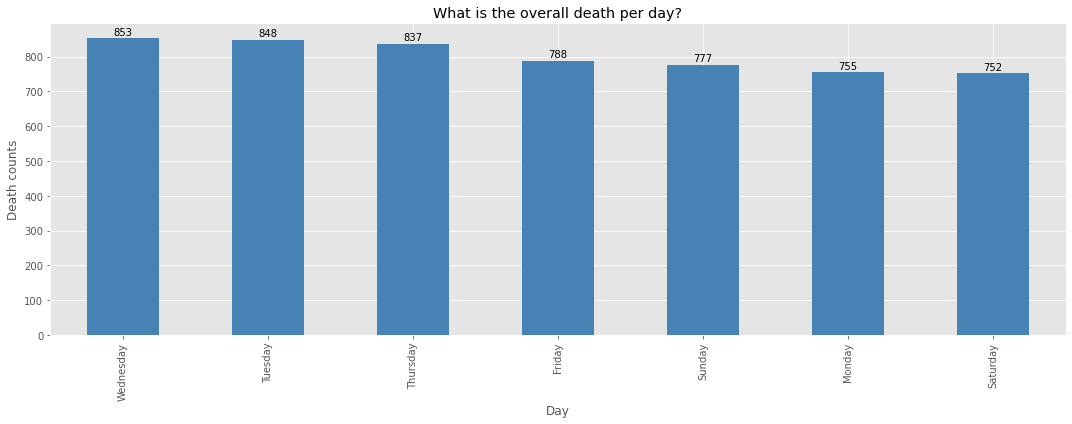

In [17]:
death_by_day = police_violence.day.value_counts()
ax = death_by_day.plot(kind = 'bar', figsize = (15,6), width = 0.5, color ='steelblue')
plt.title('What is the overall death per day?')
ax.set_xlabel('Day')
ax.set_ylabel('Death counts')

for i in ax.patches:
    y = i.get_height()
    x = i.get_x() + i.get_width()/2
    label = y
    ax.annotate(label, xy = (x, y+10), ha = 'center', color = 'black')
    
plt.tight_layout()
plt.savefig('day.jpg')

The above visual clearly shows that mostly killings occur in mid week that is, **tuesday and wednesday** and less occur towards the weekend and beginning of the new week that is, **saturday and monday**

#### Death by month

In [18]:
# extract year, month and manner of death columns from the dataframe
death_by_month = police_violence.loc[:, ['year', 'month', 'manner_of_death']]

# groupby month to make a new variable for each year and drop year column
death_by_month2015 = death_by_month[death_by_month.year == 2015].groupby('month').count().drop('year', axis = 1)
death_by_month2016 = death_by_month[death_by_month.year == 2016].groupby('month').count().drop('year', axis = 1)
death_by_month2017 = death_by_month[death_by_month.year == 2017].groupby('month').count().drop('year', axis = 1)
death_by_month2018 = death_by_month[death_by_month.year == 2018].groupby('month').count().drop('year', axis = 1)
death_by_month2019 = death_by_month[death_by_month.year == 2019].groupby('month').count().drop('year', axis = 1)
death_by_month2020 = death_by_month[death_by_month.year == 2020].groupby('month').count().drop('year', axis = 1)

# to check
#death_by_month2017

In [19]:
# dataframe for each month per year
month_death_per_year = pd.concat([death_by_month2015, death_by_month2016, death_by_month2017, death_by_month2018, 
                    death_by_month2019, death_by_month2020], axis = 1)
month_death_per_year.columns = ['2015', '2016', '2017', '2018', '2019', '2020']
month_death_per_year

2015  2016  2017  2018  2019   2020
month                                     
1        76    81    92    99    93   88.0
2        77    86   100    80    72   78.0
3        92    92    76   109    88   93.0
4        84    73    67    98    71   78.0
5        71    74    74    83    74  109.0
6        65    92    84    81    86   77.0
7       104    72    94    89    80   68.0
8        94    82    82    74    86   88.0
9        82    78    70    55    78    NaN
10       84    77    85    75    89    NaN
11       77    77    84    76    76    NaN
12       88    78    78    71   106    NaN

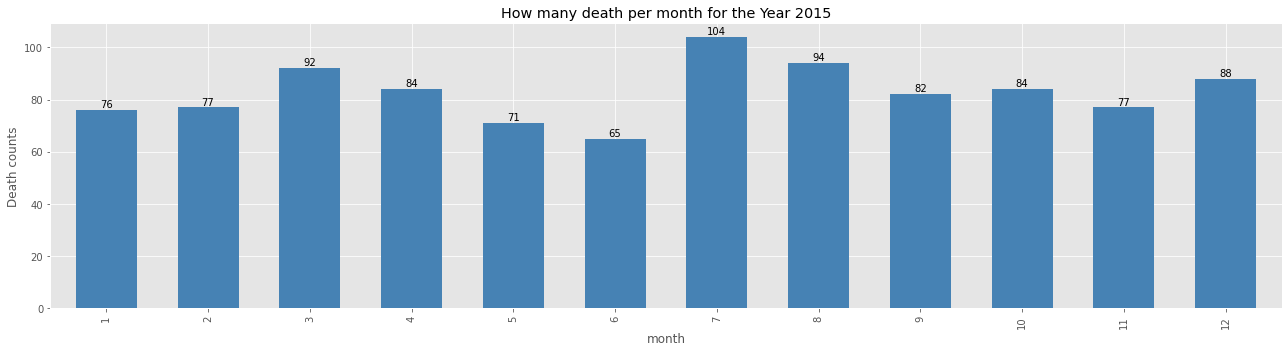

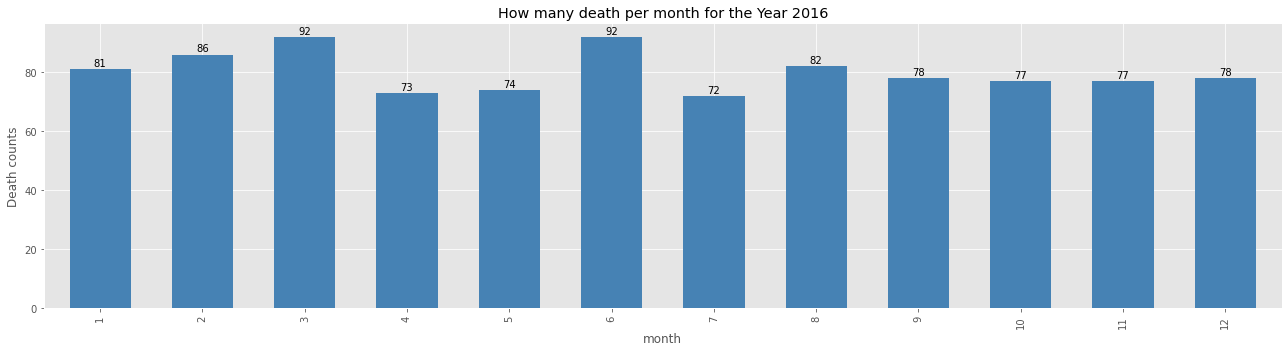

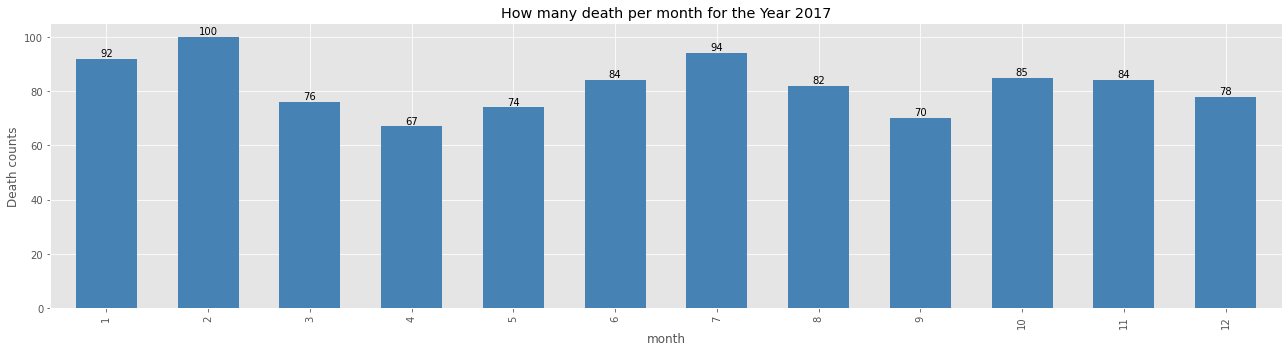

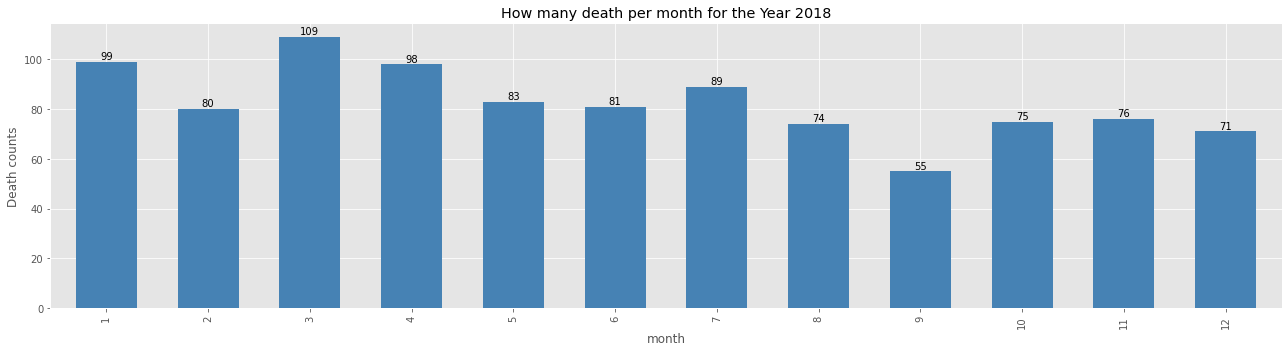

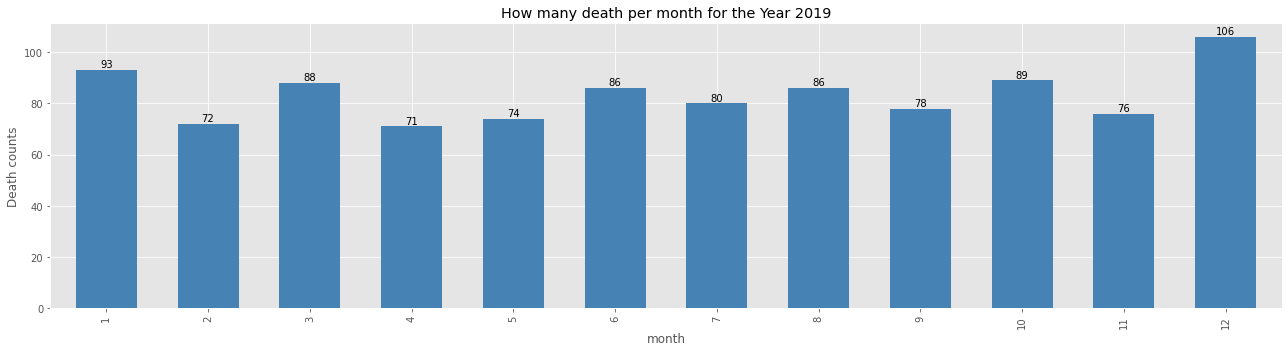

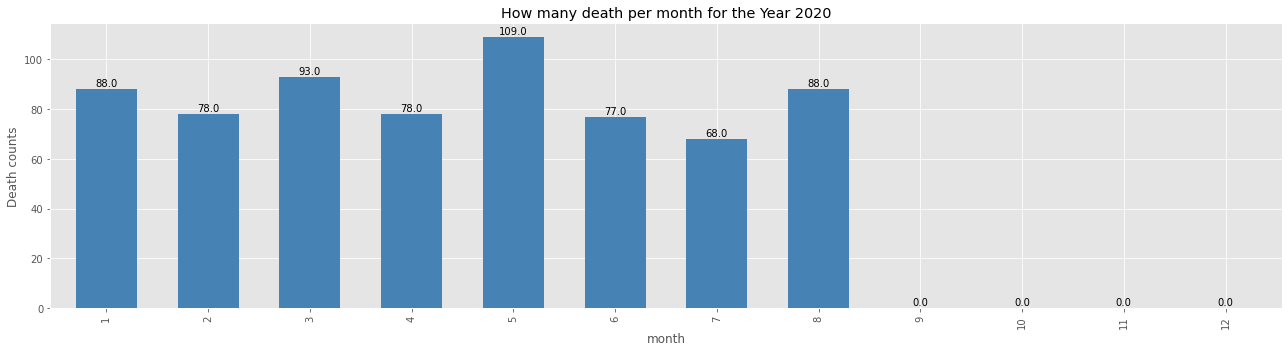

In [20]:
for k in month_death_per_year.columns:
    plt.figure()
    ax = month_death_per_year[k].plot(kind ='bar', figsize =(18,5), width =0.6, color ='steelblue')
    
    for i in ax.patches:
        y = i.get_height()
        x = i.get_x() + i.get_width()/2
        label = y
        ax.annotate(label, xy = (x, y+1), ha = 'center', color = 'black')

    plt.title(f'How many death per month for the Year {k}')
    plt.ylabel('Death counts')
    plt.tight_layout()
plt.savefig('month.jpg')

The above show the death per month for each year in a descending order. Note that the numbers on the x-axis represent the months of the year (for example 1 rep. January and 5 rep. May etc)

#### Death by year

In [21]:
death_by_year = police_violence.loc[:, ['year', 'manner_of_death']]
death_by_yeargb = death_by_year.groupby('year').count()
death_by_yeargb

manner_of_death
year                 
2015              994
2016              962
2017              986
2018              990
2019              999
2020              679

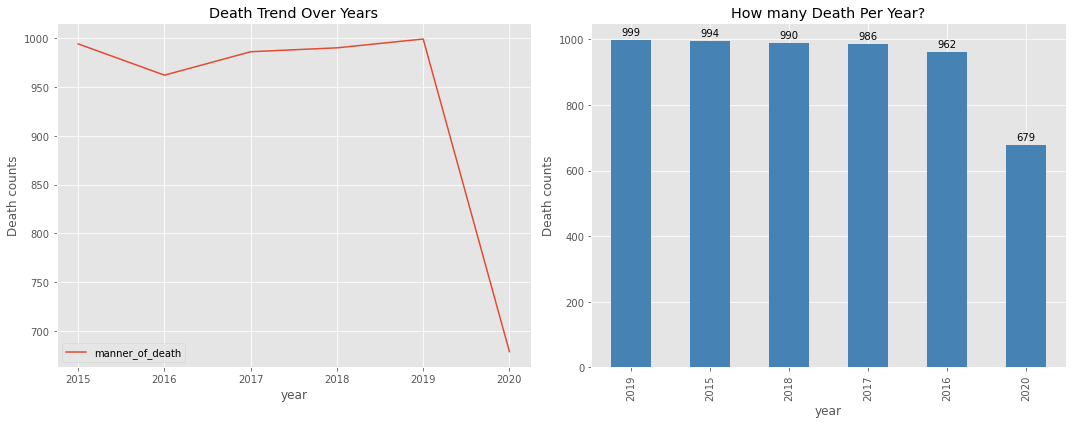

In [22]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
death_by_yeargb.plot(ax = ax[0])
death_by_yeargb.sort_values(by ='manner_of_death', ascending=False).plot(kind = 'bar', legend = None, 
                                                                         color ='steelblue', ax = ax[1])
for i in ax[1].patches:
    y = i.get_height()
    x = i.get_x() + i.get_width()/2
    label = y
    ax[1].annotate(label, xy = (x, y+15), ha = 'center', color = 'black')

ax[0].title.set_text('Death Trend Over Years')
ax[0].set_ylabel('Death counts')
ax[1].set_ylabel('Death counts')
ax[1].title.set_text('How many Death Per Year?')
plt.tight_layout()
plt.savefig('year.jpg')

Text(0.5, 1.0, 'Death Trend 2015 - 2020 by Months')

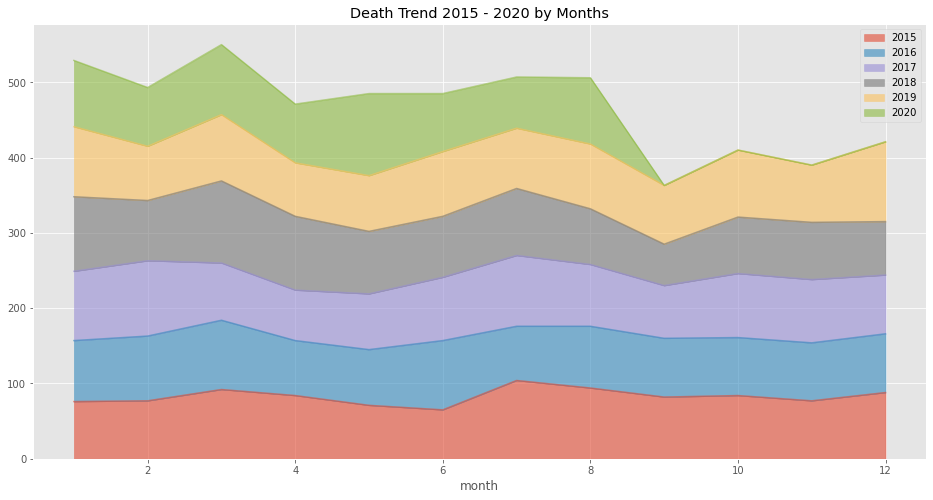

In [23]:
month_death_per_year.plot(kind = 'area', figsize = (16,8), alpha = 0.6)
plt.title('Death Trend 2015 - 2020 by Months')

### Observations

All output in this section gives information on numbers of killings that happened on a dayly, monthly and yearly basis. The above visuals clearly show that mostly killings occured in mid week that is, **Tuesday, Wednesday and Thursday** and less occur towards the weekend and beginning of the new week that is, **Saturday, Sunday and Monday.**

Studying the death by month charts, specifically looking at the first three bars on each year. It can be deduced that over the years, there's always a surge in killings in **January and March.**

Although the dataset used in this analysis was last updated in August 2020. The Total death by year chart shows that 2019 is the year with highest killing occurence so far.

<h3><a name = 'Question2'>Question 2: Percentage of age bucket (age group) and gender affected</a> </h3>

In [24]:
police_violence.age.unique()

array([53, 47, 23, 32, 39, 18, 22, 35, 34, 25, 31, 41, 30, 37, 28, 42, 36,
       49, 71, 33, 29, 43, 24, 75, 68, 27, 48, 21, 67, 19, 54, 17, 56, 61,
       45, 26, 40, 59, 38, 51, 74, 57, 46, 16, 50, 20, 77, 58, 64, 52, 63,
       44, 60, 66, 83, 72, 76, 62, 55, 69, 86, 15, 65,  6, 12, 70, 80, 14,
       82, 13, 73, 91, 79, 78, 84, 81, 89], dtype=int64)

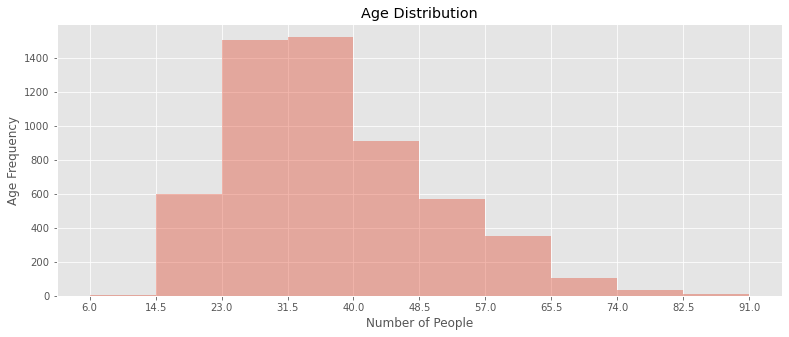

In [25]:
count, bin_edges = np.histogram(police_violence.age, 10)
police_violence.age.plot(kind = 'hist', figsize = (13,5), xticks = bin_edges, alpha = 0.4)
plt.title('Age Distribution')
plt.xlabel('Number of People')
plt.ylabel('Age Frequency')
plt.savefig('age_dist.jpg')

In [26]:
# statistics of the age distribution
stats.describe(police_violence.age)

DescribeResult(nobs=5610, minmax=(6, 91), mean=37.121212121212125, variance=163.6479899728251, skewness=0.7211888576354865, kurtosis=0.241026302421401)

The distribution of age is bimodal and skewed to the right, centered at about 37 years with most data between 27 years and 65 years, a range of 85 years, and outliers are present on the higher end which indicates death of older age as well.

In [27]:
def age_bin(col):
    '''
    function to  stratify (group) the age
    '''
    if col <= 12:
        return 'Children (0 - 12)'
    elif col > 12 and col <= 18:
        return 'Teen (13 - 18)'
    elif col > 18 and col <= 40:
        return 'Youth (19 - 40)'
    else:
        return 'Adult (41 - above)'
    

In [28]:
# apply the function on age column and store in a variable
police_violence['age_binned'] = police_violence.age.apply(age_bin)

In [29]:
police_violence.head()

id                name       date   manner_of_death       armed  age  \
0   3          Tim Elliot 2015-01-02              shot         gun   53   
1   4    Lewis Lee Lembke 2015-01-02              shot         gun   47   
2   5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed   23   
3   8     Matthew Hoffman 2015-01-04              shot  toy weapon   32   
4   9   Michael Rodriguez 2015-01-04              shot    nail gun   39   

  gender race           city state  ...         flee body_camera longitude  \
0      M    A        Shelton    WA  ...  Not fleeing       False  -123.122   
1      M    W          Aloha    OR  ...  Not fleeing       False  -122.892   
2      M    H        Wichita    KS  ...  Not fleeing       False   -97.281   
3      M    W  San Francisco    CA  ...  Not fleeing       False  -122.422   
4      M    H          Evans    CO  ...  Not fleeing       False  -104.692   

   latitude  is_geocoding_exact  year  month  month_name       day  \
0    47.247                True  2015      1     January    Friday   
1    45.487                True  2015      1     January    Friday   
2    37.695                True  2015      1     January  Saturday   
3    37.763                True  2015      1     January    Sunday   
4    40.384                True  2015      1     January    Sunday   

           age_binned  
0  Adult (41 - above)  
1  Adult (41 - above)  
2     Youth (19 - 40)  
3     Youth (19 - 40)  
4     Youth (19 - 40)  

[5 rows x 22 columns]

In [30]:
age_group = police_violence.age_binned.value_counts().to_frame()
age_group

age_binned
Youth (19 - 40)           3546
Adult (41 - above)        1866
Teen (13 - 18)             195
Children (0 - 12)            3

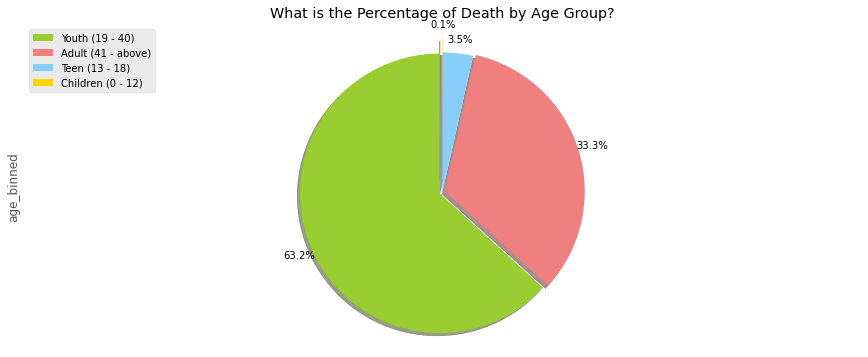

In [31]:
colors_list = ['yellowgreen', 'lightcoral', 'lightskyblue', 'gold',]
explode_list = [0.02, 0.02, 0, 0.1] # ratio for each continent with which to offset each wedge.

age_group.age_binned.plot(kind = 'pie', figsize = (15,6), colors = colors_list,
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                            pctdistance=1.1,  # push the % out of the chart area
                            shadow=True,       # add shadow      
                            labels = None,      # remove labels on the chart
                            explode = explode_list
                            )
plt.title('What is the Percentage of Death by Age Group?')
plt.axis('equal') # bring the chart to the chart to center
plt.legend(labels = age_group.index, loc='upper left')
plt.savefig('age.jpg')

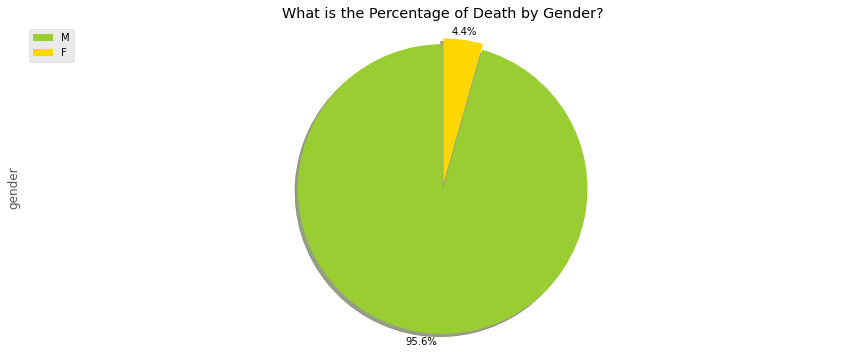

In [32]:
# grab the gender to dataframe
gender_proportion = police_violence.gender.value_counts().to_frame()

# plot proportion
colors_list = ['yellowgreen', 'gold',]
explode_list = [0, 0.04] # ratio for each continent with which to offset each wedge.

gender_proportion.gender.plot(kind = 'pie', figsize = (15,6), colors = colors_list,
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                            pctdistance=1.06,  # push the % out of the chart area
                            shadow=True,       # add shadow      
                            labels = None,      # remove labels on the chart
                            explode = explode_list
                            )
plt.title('What is the Percentage of Death by Gender?')
plt.axis('equal') # bring the chart to the chart to center
plt.legend(labels = gender_proportion.index, loc='upper left')
plt.savefig('gender.jpg')

### Observations

The age stratification above show that the age range most affected by the violence is between 19 and 40 years which I defined as Youth and recorded 63.1% of the population. The age group between 19 years and 40 years recoreded 3481, and 41 years and above recorded 1839. Moreso, the violence mostly affected the male gender with a percentage of 95.5%. A very small percentage of 4.5 was recorded for female death.

<h3><a name = 'Question3'>Question 3: Most affected race, state, city and demography</a> </h3>

In [33]:
race_rename = {'A': 'Asian American', 'W': 'White American', 'H': 'Hawalian Natives', 'O': 'Other Pacific Islander',
                                                         'B': 'Black American', 'N': 'Native Americans'}

police_violence.race = police_violence.race.replace(race_rename)

In [34]:
police_violence.race.unique()

array(['Asian American', 'White American', 'Hawalian Natives',
       'Black American', 'Other Pacific Islander', 'Native Americans'],
      dtype=object)

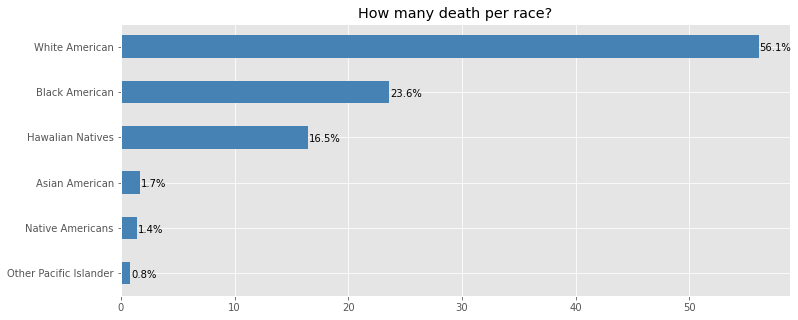

In [35]:
# extract affected race
all_race = police_violence.race.value_counts().sort_values()/ police_violence.shape[0] * 100
all_race.columns = ['race', 'race_counts']

# plot affected races on bar
all_race.plot(kind = 'barh', color = 'steelblue', figsize = (12,5))
plt.title('How many death per race?')

for index, value in enumerate(all_race): 
    label = '{:.1%}'.format(value/100) # format values with percent
    
    # place text at the end of bar ()
    plt.annotate(label, xy=(value + 0.1, index - 0.1), color='black')
plt.savefig('race.jpg')

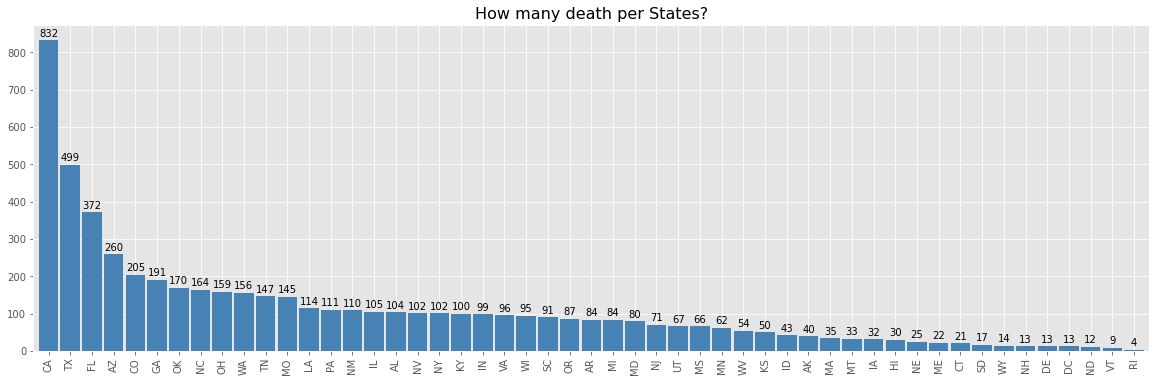

In [36]:
all_state = police_violence.state.value_counts()
ax = all_state.plot(kind = 'bar', color = 'steelblue', figsize = (20,6), width = 0.9)
plt.title('How many death per States?', size = 16)

for i in ax.patches:
    y = i.get_height()
    x = i.get_x() + i.get_width()/2
    label = y
    ax.annotate(label, xy = (x, y+10), ha = 'center', color = 'black')
plt.savefig('state.jpg')

In [37]:
import plotly.graph_objects as go

data_geo = pd.value_counts(police_violence['state'])
fig = go.Figure(data = go.Choropleth(locations = data_geo.index,
                                     z = data_geo.values.astype(float), 
                                     colorscale = 'Blues',
                                    locationmode= 'USA-states', 
                                    colorbar_title = 'Total Frequency'))

fig.update_layout(title_text = 'Frequency Distribution of Police Violence by City in US', geo_scope = 'usa')
fig.show()
plt.savefig('map.jpg')

<Figure size 432x288 with 0 Axes>

In [38]:
print(f'The total number of cities affected is: {police_violence.city.nunique()}')

The total number of cities affected is: 2532


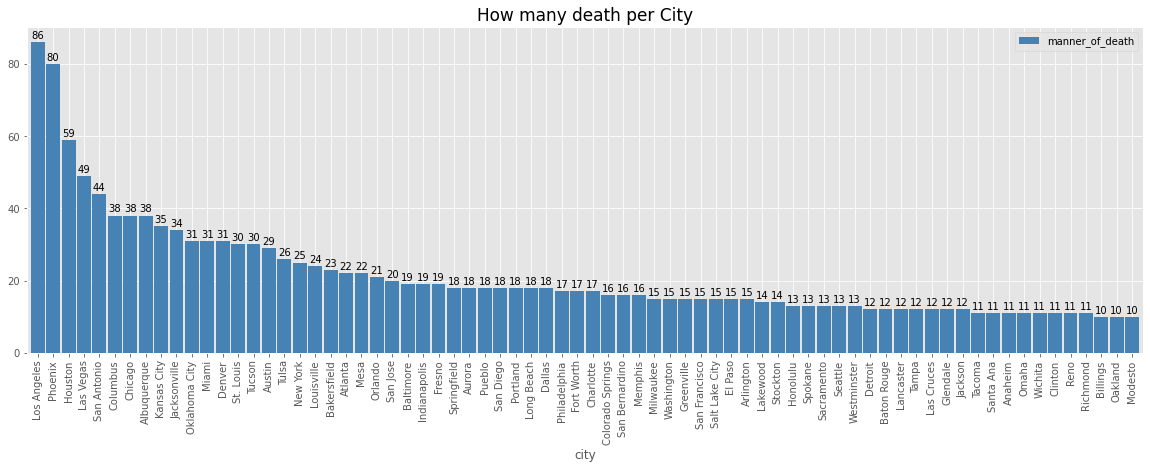

In [39]:
# plot the count for the first 72 cities
all_city = police_violence.loc[:, ['city', 'manner_of_death']]
all_city = all_city.groupby('city').count().sort_values(by = 'manner_of_death', ascending = False).head(72)
ax = all_city.plot(kind = 'bar', figsize = (20,6), width = 0.9, color ='steelblue')
plt.title('How many death per City', size = 17)

for i in ax.patches:
    y = i.get_height()
    x = i.get_x() + i.get_width()/2
    label = y
    ax.annotate(label, xy = (x, y+1), ha = 'center', color = 'black')
plt.savefig('cities.jpg')

### Observation

The most affected races in the violence are the White and the Black or African Americans with top five states which span across Califonia, Texas, Florida, Arizona and colorado. 2459 cities was affected but dew to the large unique values, I plotted the first 72 cities affected.

<h3><a name = 'Question4'>Question 4: Proportion of flee or not flee and threat to the police or not </a></h3>

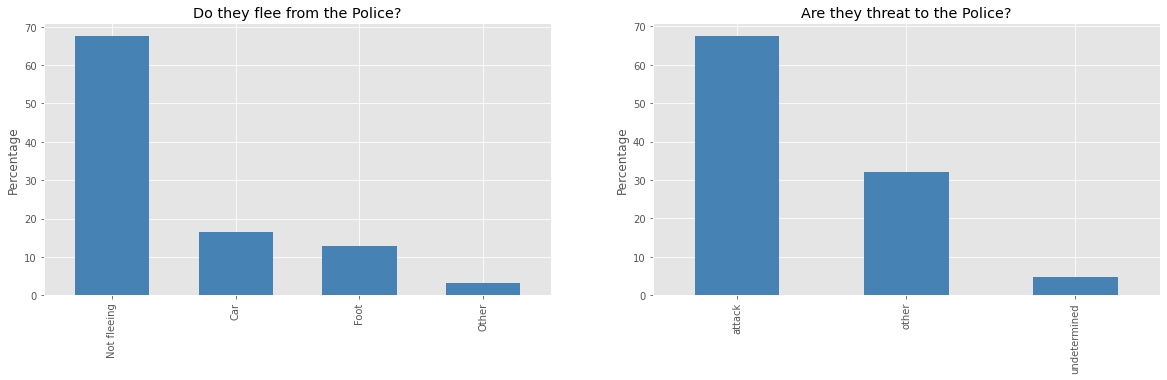

In [40]:
fig, ax = plt.subplots(1,2, figsize = (20, 8))

flee = police_violence.flee.value_counts() / police_violence.shape[0] * 100
flee.plot(kind = 'bar', figsize = (20, 5), width = 0.6, ax = ax[0], color = 'steelblue')
ax[0].title.set_text('Do they flee from the Police?')
ax[0].set_ylabel('Percentage')

threat = police_violence.threat_level.value_counts() / 5389 * 100
threat.plot(kind = 'bar', figsize = (20, 5), width = 0.5, color = 'steelblue', ax = ax[1])
ax[1].title.set_text('Are they threat to the Police?')
ax[1].set_ylabel('Percentage')
plt.savefig('flee_threat.jpg')

### Observation

The above output shows that most (that is, more than 60%) of the American citizens who are involved in this violence do not flee from the Police and most likely to attack the Police.

But, the question is what gave them the confidence to threaten the Police?

Answering the next question will also give the answer to that. 

<h3><a name = 'Question5'>Question 5: Most used arms </a></h3>

In [41]:
from wordcloud import WordCloud, STOPWORDS
print ('Wordcloud is imported!')

Wordcloud is imported!


In [42]:
most_arm = police_violence.armed.unique()
wordcloud = WordCloud(background_color= 'lightsteelblue').generate(' '.join(most_arm))
print('Word cloud created!')

Word cloud created!


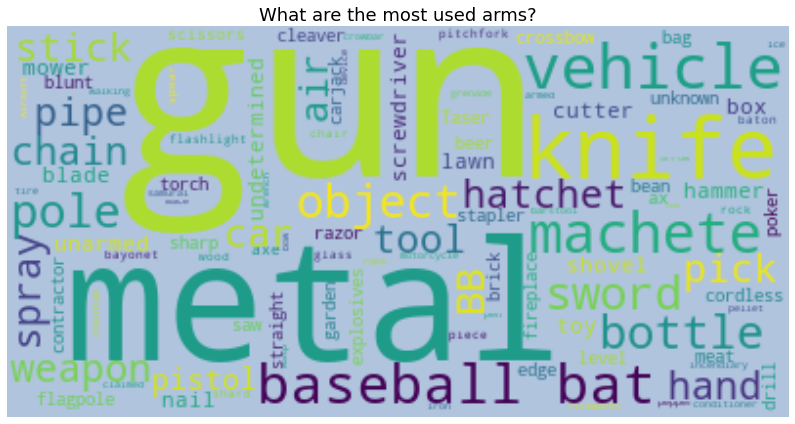

<Figure size 432x288 with 0 Axes>

In [43]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('What are the most used arms?', size = 18)
plt.axis('off') # remove the scale on the graph
plt.show()
plt.savefig('armed.jpg')

### Observation

The answer to question 4 show that the citizens do no flee from Police and also they are threat to the Police. The word cloud shows the reason for the threat and why they don't flee from the Police. The depiction tells that a very large percentage of the citizens are armed with gun, knife, unarmed, toy weapon and vehicle which are the top arms.

<h3><a name = 'Question6'>Question 6: Black lives Matter, further insight on black race </a></h3>

In [44]:
black_race = police_violence[police_violence['race'] == 'Black American']

In [45]:
black_race.head()

id                              name       date manner_of_death  \
9   17                   Leslie Sapp III 2015-01-06            shot   
11  21                         Ron Sneed 2015-01-07            shot   
12  22    Hashim Hanif Ibn Abdul-Rasheed 2015-01-07            shot   
14  27  Omarr Julian Maximillian Jackson 2015-01-07            shot   
17  36               Artago Damon Howard 2015-01-08            shot   

         armed  age gender            race         city state  ...  \
9   toy weapon   47      M  Black American    Knoxville    PA  ...   
11         gun   31      M  Black American     Freeport    TX  ...   
12       knife   41      M  Black American     Columbus    OH  ...   
14         gun   37      M  Black American  New Orleans    LA  ...   
17     unarmed   36      M  Black American       Strong    AR  ...   

           flee body_camera longitude  latitude  is_geocoding_exact  year  \
9   Not fleeing       False   -79.991    40.413                True  2015   
11  Not fleeing       False   -95.369    28.955                True  2015   
12  Not fleeing       False   -82.885    39.999                True  2015   
14         Foot        True   -90.012    30.022                True  2015   
17  Not fleeing       False   -92.359    33.111                True  2015   

    month  month_name        day          age_binned  
9       1     January    Tuesday  Adult (41 - above)  
11      1     January  Wednesday     Youth (19 - 40)  
12      1     January  Wednesday  Adult (41 - above)  
14      1     January  Wednesday     Youth (19 - 40)  
17      1     January   Thursday     Youth (19 - 40)  

[5 rows x 22 columns]

In [46]:
print(f'The total number of black killings is {black_race.shape[0]} out the total population of {police_violence.shape[0]}.\n')

print(f'It is also {black_race.shape[0] / police_violence.shape[0] * 100:.1f}% of the total population.')

The total number of black killings is 1322 out the total population of 5610.

It is also 23.6% of the total population.


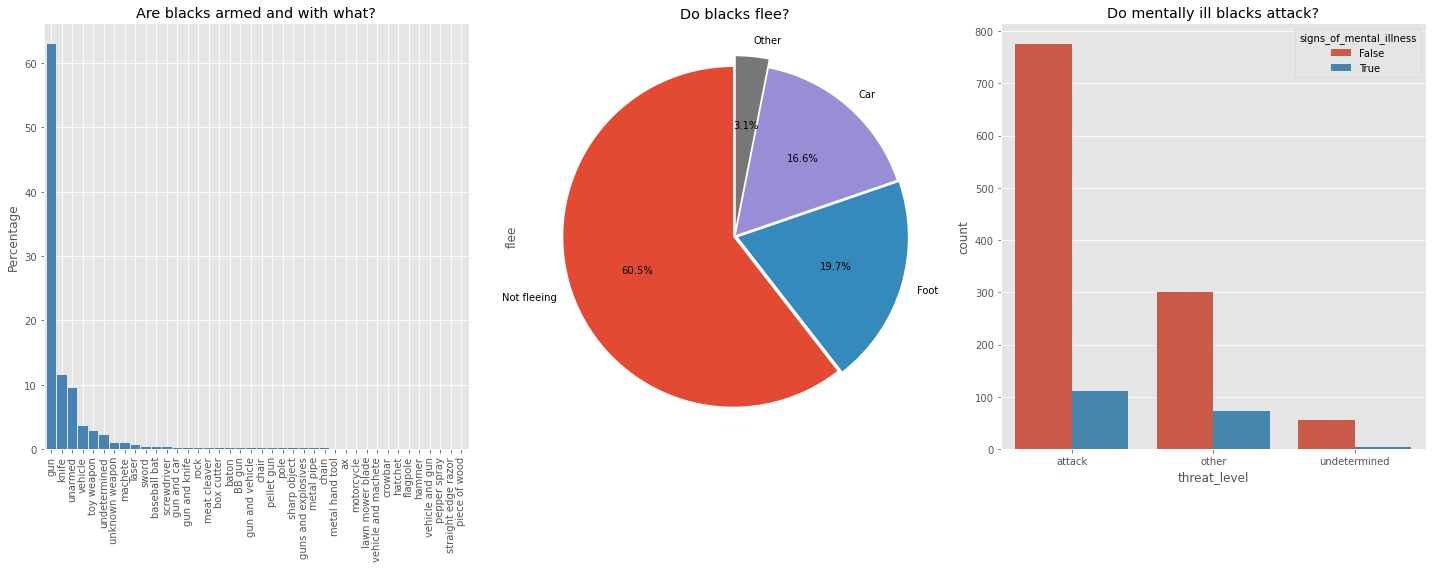

In [47]:
fig, ax = plt.subplots(1,3, figsize = (20, 8))

# percentage of black armed
black_percent_armed = black_race.armed.value_counts() / black_race.shape[0] * 100

black_percent_armed.plot(kind = 'bar', color = 'steelblue', width = 0.9, ax = ax[0])
ax[0].set_ylabel('Percentage')
black_race.flee.value_counts().plot(kind = 'pie', autopct='%1.1f%%', startangle = 90, 
                                   explode = [0.01, 0.02, 0.01, 0.06], ax = ax[1])
sb.countplot(x = 'threat_level', hue = 'signs_of_mental_illness', 
             data = black_race, ax = ax[2]).set_title('Do mentally ill blacks attack?')
ax[0].title.set_text('Are blacks armed and with what?')
ax[1].title.set_text('Do blacks flee?')

plt.tight_layout()
plt.savefig('black.jpg')

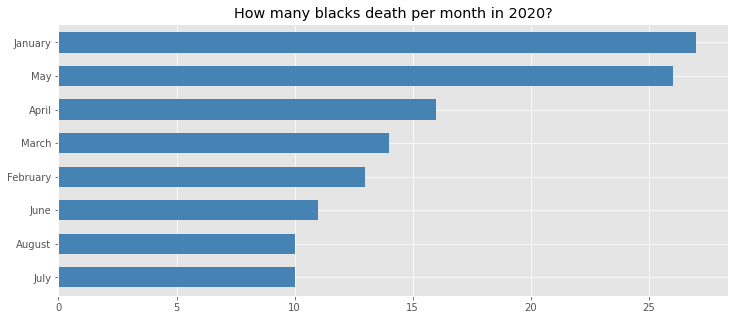

In [48]:
# the blacks death surge
black_2020 = black_race[black_race['year'] == 2020]
black_2020.month_name.value_counts().sort_values().plot(kind = 'barh', color = 'steelblue', width = 0.6,
                                                                      figsize = (12, 5)   )
plt.title('How many blacks death per month in 2020?')
plt.savefig('black2020.jpg')

In [49]:
# age distribution of the blacks
stats.describe(black_race.age)

DescribeResult(nobs=1322, minmax=(13, 77), mean=32.57110438729198, variance=126.07858908977634, skewness=0.962847932055369, kurtosis=0.7729925548772156)

### Obseravtion

The whole population contains blacks record of 23.7%. The above shows that more than 60% of the black people are armed with gun, don't flee and they are threat to the police. More so, those who attack are not mentally ill. 

**Uptill now, the given dataset shows that there is only 10 black death in August 2020.**

### Evaluation - (Conclusion)

### Deployment - Storytelling (Medium)

The medium post for this analysis is given <a href = '#'>here</a>